In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [6]:
data=pd.read_csv("data\data_hotel_booking.csv")

In [8]:
data.select_dtypes(include=[np.number]).columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [4]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [116]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [117]:
data.duplicated().value_counts()

False    87396
True     31994
Name: count, dtype: int64

In [118]:
data.drop_duplicates(inplace=True)

In [119]:
data.duplicated().sum()

0

In [120]:
# Analyzing missing values in the dataset
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

missing_values_summary = pd.DataFrame({
    'Missing Values': missing_values, 
    'Percentage': missing_values_percentage
})

missing_values_summary[missing_values_summary['Missing Values'] > 0]

,Missing Values,Percentage
children,4,0.004577
country,452,0.517186
agent,12193,13.951439
company,82137,93.982562


In [121]:
data.drop(columns="company",axis=1,inplace=True)

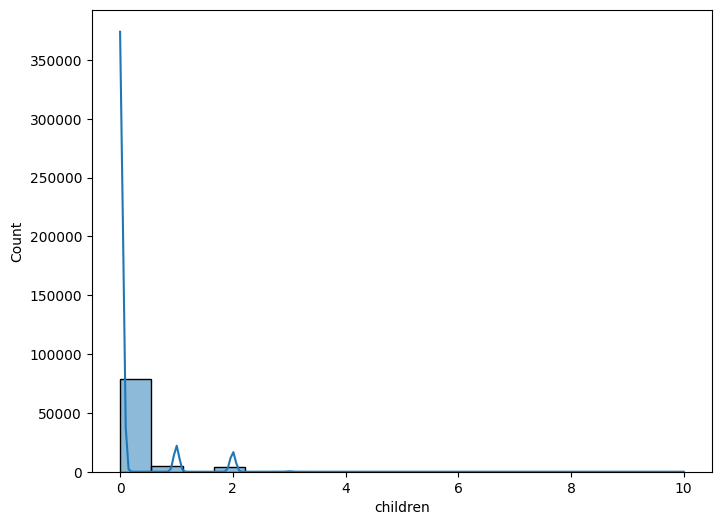

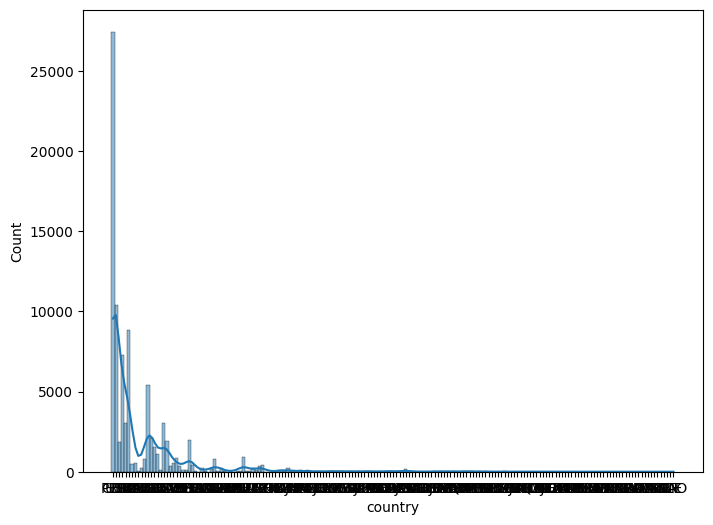

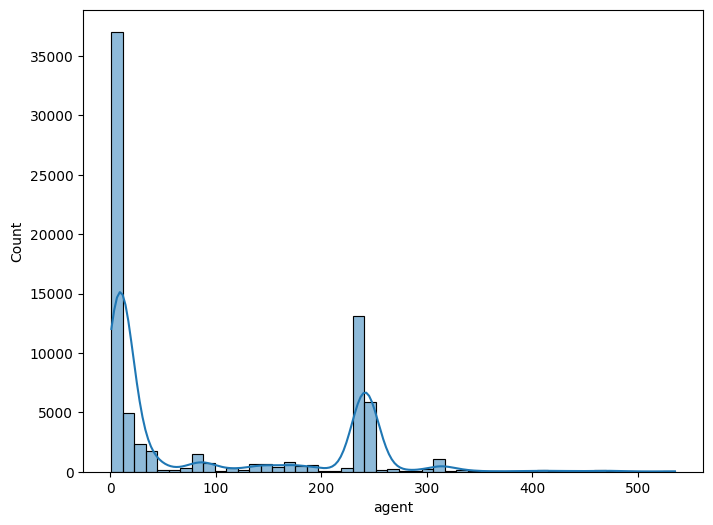

In [122]:
liste=["children","country","agent"]
for i in data[liste]:
    plt.figure(figsize=(8,6))
    sns.histplot(data=data,x=data[i],kde=True)
    plt.show()


In [123]:
data.dropna(axis=0,inplace=True)

In [124]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [125]:
data.describe(include="O")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,75074,75074,75074,75074,75074,75074,75074,75074,75074,75074,75074,75074
unique,2,12,5,174,7,4,8,10,3,4,3,923
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-03-28
freq,47836,10210,56826,19596,51216,67850,47615,40217,74193,62487,52612,183


In [126]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000,75074.000000
mean,0.299198,86.919133,2016.225524,26.919799,15.797720,1.070237,2.750939,1.924581,0.148893,0.010510,0.014626,0.019687,0.032888,0.248208,93.932467,0.810241,110.200765,0.072142,0.739430
std,0.457910,85.956180,0.682746,13.362889,8.845067,1.032594,2.042816,0.519042,0.471500,0.113359,0.120049,0.316177,0.508998,0.698086,113.111664,10.573689,54.386390,0.260214,0.832635
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,76.000000,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,101.650000,0.000000,1.000000
75%,1.000000,134.000000,2017.000000,37.000000,24.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,136.842500,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000


In [127]:
categorical_columns = data.select_dtypes(include=["object"]).columns

In [128]:
numerical_columns = data.select_dtypes(include=["float64","int64"]).columns

print("Size before removing outlier samples: " + str(len(data[numerical_columns])))
data = data[(np.abs(stats.zscore(data[numerical_columns])) < 3).all(axis=1)]
print("Size after removing outlier samples: " + str(len(data[numerical_columns])))

Size before removing outlier samples: 75074
Size after removing outlier samples: 60061


<Axes: >

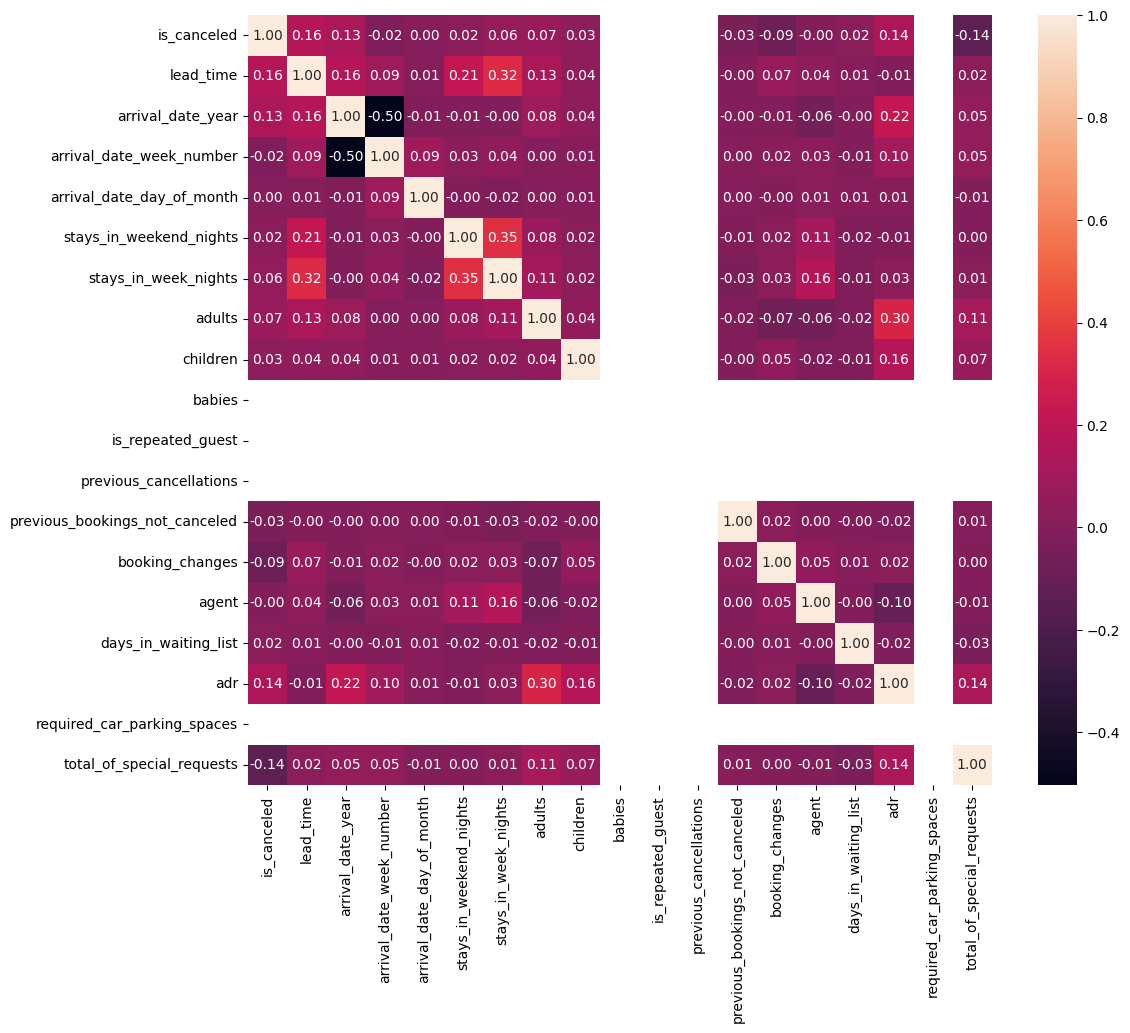

In [129]:
corealition=data[numerical_columns].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corealition,fmt=".2f",annot=True)

In [130]:
from datetime import datetime

# Function to combine year, month, and day columns and create a datetime object
def create_date(year, month, day):
    date_str = f"{year}-{month}-{day}"
    return datetime.strptime(date_str, "%Y-%B-%d")

# Applying the function to the dataset
data['arrival_date'] = data.apply(lambda row: create_date(row['arrival_date_year'], 
                                                         row['arrival_date_month'], 
                                                         row['arrival_date_day_of_month']), axis=1)

# Extracting new features from the arrival_date
data['arrival_day_of_week'] = data['arrival_date'].dt.day_name()
data['is_weekend'] = data['arrival_day_of_week'].isin(['Saturday', 'Sunday']).astype(int)

# Displaying the new features
data[['arrival_date', 'arrival_day_of_week', 'is_weekend']]


,arrival_date,arrival_day_of_week,is_weekend
3,2015-07-01,Wednesday,0
4,2015-07-01,Wednesday,0
7,2015-07-01,Wednesday,0
8,2015-07-01,Wednesday,0
9,2015-07-01,Wednesday,0
...,...,...,...
119384,2017-08-30,Wednesday,0
119385,2017-08-30,Wednesday,0
119386,2017-08-31,Thursday,0
119388,2017-08-31,Thursday,0


# BUNDAN SORNAYI INCELE

In [131]:
X=data.copy()
X=X.drop(["is_canceled"],axis=1,inplace=True)
y=data["is_canceled"]

In [132]:
data['family_group'] = data['adults'] + data['babies'] + data['children']
print(data['family_group'].max())

4.0


In [133]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [134]:
data.describe(include="O")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,arrival_day_of_week
count,60061,60061,60061,60061,60061,60061,60061,60061,60061,60061,60061,60061
unique,2,12,5,169,7,4,8,10,3,4,3,7
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Monday
freq,41251,7898,45212,14100,42105,55076,40518,34754,59641,50739,41441,9772


In [135]:
data_encoded=pd.get_dummies(data[categorical_columns],drop_first=True)
data_encoded

,reservation_status_date,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
3,2015-07-02,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2015-07-03,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
7,2015-07-03,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
8,2015-05-06,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9,2015-04-22,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,2017-09-06,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
119385,2017-09-06,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
119386,2017-09-07,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
119388,2017-09-07,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [136]:
data_data =pd.concat([data[numerical_columns], data_encoded],axis=1)
data_data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
3,0,13,2015,27,1,0,1,1,0.0,0,...,False,False,False,False,False,False,True,False,True,False
4,0,14,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False
7,0,9,2015,27,1,0,2,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False
8,1,85,2015,27,1,0,3,2,0.0,0,...,False,False,False,False,False,False,True,False,False,False
9,1,75,2015,27,1,0,3,2,0.0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,2017,35,30,2,5,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False
119385,0,23,2017,35,30,2,5,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False
119386,0,102,2017,35,31,2,5,3,0.0,0,...,False,False,False,False,False,False,True,False,True,False
119388,0,109,2017,35,31,2,5,2,0.0,0,...,False,False,False,False,False,False,True,False,True,False


In [137]:
X=data_data.drop(["is_canceled"],axis=1)
y=data_data["is_canceled"]

In [138]:
! pip install imbalanced-learn

In [139]:
data_distribution=data["is_canceled"].value_counts()
data_distribution

IR = data['is_canceled'].value_counts().max() / data['is_canceled'].value_counts().min()
print(f'Imbalance Ratio: {IR}')
print(data_distribution)

Imbalance Ratio: 2.2256176154672396
is_canceled
0    41441
1    18620
Name: count, dtype: int64


In [140]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(y_resampled.value_counts())

is_canceled
0    41441
1    41441
Name: count, dtype: int64


In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_resampled,y_resampled, test_size=0.3,random_state=22)


In [143]:
numerical_columns = data_data.select_dtypes(include=['int64', 'float64']).columns
X_train_numerical = X_train[numerical_columns]
X_test_numerical = X_test[numerical_columns]

# StandardScaler ile ölçeklendirme
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_numerical)
X_test_scaled = sc.transform(X_test_numerical)


KeyError: "['is_canceled'] not in index"